In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)


Matplotlib is building the font cache; this may take a moment.


Python version: 3.13.7 (v3.13.7:bcee1c32211, Aug 14 2025, 19:10:51) [Clang 16.0.0 (clang-1600.0.26.6)]
Pandas version: 2.3.3
NumPy version: 2.4.0


In [2]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.0 MB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [python-docx]


In [3]:
from docx import Document
import pandas as pd
import os

# Paths
doc_path = "data/Thesis MSc.docx"
out_dir = "data/extracted_tables"

# Create output folder
os.makedirs(out_dir, exist_ok=True)

# Load document
doc = Document(doc_path)

saved_tables = []

for i, table in enumerate(doc.tables, start=1):
    rows = []
    for row in table.rows:
        rows.append([cell.text.strip().replace("\n", " ") for cell in row.cells])

    df = pd.DataFrame(rows)
    out_path = f"{out_dir}/table_{i:02d}.csv"
    df.to_csv(out_path, index=False, header=False)
    saved_tables.append(out_path)

print(f"Extracted {len(saved_tables)} tables:")
saved_tables


Extracted 24 tables:


['data/extracted_tables/table_01.csv',
 'data/extracted_tables/table_02.csv',
 'data/extracted_tables/table_03.csv',
 'data/extracted_tables/table_04.csv',
 'data/extracted_tables/table_05.csv',
 'data/extracted_tables/table_06.csv',
 'data/extracted_tables/table_07.csv',
 'data/extracted_tables/table_08.csv',
 'data/extracted_tables/table_09.csv',
 'data/extracted_tables/table_10.csv',
 'data/extracted_tables/table_11.csv',
 'data/extracted_tables/table_12.csv',
 'data/extracted_tables/table_13.csv',
 'data/extracted_tables/table_14.csv',
 'data/extracted_tables/table_15.csv',
 'data/extracted_tables/table_16.csv',
 'data/extracted_tables/table_17.csv',
 'data/extracted_tables/table_18.csv',
 'data/extracted_tables/table_19.csv',
 'data/extracted_tables/table_20.csv',
 'data/extracted_tables/table_21.csv',
 'data/extracted_tables/table_22.csv',
 'data/extracted_tables/table_23.csv',
 'data/extracted_tables/table_24.csv']

In [4]:
import pandas as pd
import glob

paths = sorted(glob.glob("data/extracted_tables/table_*.csv"))

for p in paths:
    df = pd.read_csv(p, header=None)
    print("\n==============================")
    print(p)
    print(df.head(6))



data/extracted_tables/table_01.csv
                          0  \
0                  Category   
1      Long-chain FA (≥C14)   
2  Medium-chain FA (C8–C12)   
3             Triglycerides   
4                     Waxes   
5                   Butters   

                                                   1  \
0                                       Solid Lipids   
1  Stearic acid (Phunpee et al., 2020) Palmitic a...   
2  Lauric acid (Orienti et al., 2021) Capric acid...   
3  Glyceryl monostearate (Chesneau et al., 2021; ...   
4         Beeswax Carnauba wax (Lucena et al., 2021)   
5  Cocoa butter (Linder et al., 2017) Shea butter...   

                                                   2  
0                                      Liquid Lipids  
1  Argan oil (Silva et al., 2021) Castor oil (Pra...  
2  Glyceryl tricaprylate (Jansen et al., 2018) Gl...  
3  Miglyol 808 (Jarvis et al., 2016) Miglyol 812 ...  
4                                                  –  
5                      

In [5]:
import pandas as pd
import glob

paths = sorted(glob.glob("data/extracted_tables/table_*.csv"))

keywords = ["size", "nm", "pdi", "zeta", "potential", "mv", "polydispersity", "z-average", "zp"]

hits = []

for p in paths:
    df = pd.read_csv(p, header=None)
    text = " ".join(df.fillna("").astype(str).values.flatten()).lower()
    score = sum(k in text for k in keywords)
    if score >= 2:   # show only likely tables
        hits.append((score, p))

hits_sorted = so_


NameError: name 'so_' is not defined

In [6]:
import pandas as pd
import glob

paths = sorted(glob.glob("data/extracted_tables/table_*.csv"))

keywords = [
    "size", "nm", "pdi", "zeta", "potential",
    "mv", "polydispersity", "z-average", "zp"
]

hits = []

for p in paths:
    df = pd.read_csv(p, header=None)
    text = " ".join(df.fillna("").astype(str).values.flatten()).lower()
    score = sum(k in text for k in keywords)
    if score >= 2:   # show only likely tables
        hits.append((score, p))

# ✅ THIS was the error before — now fixed
hits_sorted = sorted(hits, reverse=True)

hits_sorted


[(6, 'data/extracted_tables/table_06.csv'),
 (6, 'data/extracted_tables/table_05.csv'),
 (2, 'data/extracted_tables/table_04.csv')]

In [7]:
for score, p in hits_sorted[:3]:
    df = pd.read_csv(p, header=None)
    print("\n==============================")
    print("Score:", score, "|", p)
    print(df.head(10))



Score: 6 | data/extracted_tables/table_06.csv
                                                   0  \
0  Table 3.3: Effect of Lyophilization and Sucros...   
1                                        Formulation   
2                                            Batch A   
3                                            Batch A   
4                                            Batch A   
5                                            Batch B   
6                                            Batch B   
7                                            Batch B   
8                                            Batch D   
9                                            Batch D   

                                                   1  \
0  Table 3.3: Effect of Lyophilization and Sucros...   
1                          Sucrose Concentration (%)   
2                                                NaN   
3                                                  7   
4                                                 10   


In [8]:
import pandas as pd
import glob
import re

paths = sorted(glob.glob("data/extracted_tables/table_*.csv"))

candidates = []
for p in paths:
    df = pd.read_csv(p, header=None)
    text = " ".join(df.fillna("").astype(str).values.flatten()).lower()
    if ("table 3.1" in text) and ("z-average" in text or "z average" in text) and ("pi" in text or "pdi" in text) and ("zp" in text or "zeta" in text):
        candidates.append(p)

candidates


['data/extracted_tables/table_04.csv']

In [9]:
import numpy as np

t31_path = candidates[0]
raw = pd.read_csv(t31_path, header=None)

# Find the column that contains the word "Value" (this is where your numbers are)
value_col = None
for c in raw.columns:
    col_text = " ".join(raw[c].fillna("").astype(str).tolist()).lower()
    if "value" in col_text:
        value_col = c
        break

print("Table 3.1 file:", t31_path)
print("Detected value column:", value_col)

# Extract formulation labels (Batch A–E) from anywhere in the table
all_text = raw.fillna("").astype(str)
batch_list = []
for r in range(all_text.shape[0]):
    for c in range(all_text.shape[1]):
        m = re.search(r"(batch\s+[a-e])", all_text.iat[r, c].lower())
        if m:
            batch_list.append(m.group(1).title())

# Keep unique in order (Batch A, Batch B, ...)
seen = set()
batches = []
for b in batch_list:
    if b not in seen:
        seen.add(b)
        batches.append(b)

print("Detected batches:", batches)

# Extract numeric values from the value column (or from entire table if value_col not found)
if value_col is not None:
    nums = pd.to_numeric(raw[value_col], errors="coerce").dropna().tolist()
else:
    nums = pd.to_numeric(raw.stack(), errors="coerce").dropna().tolist()

# Remove obvious non-measurement integers (e.g., 180, 200, 240 from TO labels if they leaked)
nums = [x for x in nums if abs(x) < 150]  # keeps 50–100 sizes, 0.xx PDI, -30 ZP, etc.

print("First 15 numeric values:", nums[:15])
print("Total numeric values:", len(nums))

# Each batch should contribute 3 values in order: Z-average, PI, ZP
expected = len(batches) * 3
print("Expected values (batches*3):", expected)

# If there are extra values, keep the first expected values (usually correct)
nums = nums[:expected]

# Build tidy dataframe
rows = []
for i, b in enumerate(batches):
    zavg = nums[i*3 + 0]
    pdi  = nums[i*3 + 1]
    zp   = nums[i*3 + 2]
    rows.append([b, zavg, pdi, zp])

t31 = pd.DataFrame(rows, columns=["FormulationID", "Size_nm", "PDI", "ZP_mV"])
t31


Table 3.1 file: data/extracted_tables/table_04.csv
Detected value column: 2
Detected batches: ['Batch A', 'Batch B', 'Batch C', 'Batch D', 'Batch E']
First 15 numeric values: [51.35, 0.269, -32.53, 70.63, 0.237, -33.86, 72.42, 0.2021, -33.99, 80.56, 0.1518, -32.22, 88.73, 0.2518, -33.22]
Total numeric values: 15
Expected values (batches*3): 15


,FormulationID,Size_nm,PDI,ZP_mV
0,Batch A,51.35,0.2690,-32.53
1,Batch B,70.63,0.2370,-33.86
2,Batch C,72.42,0.2021,-33.99
3,Batch D,80.56,0.1518,-32.22
4,Batch E,88.73,0.2518,-33.22


In [10]:
ee_raw = pd.read_csv("data/extracted_tables/table_23.csv", header=None)

# First row is header in your EE table
ee = ee_raw.copy()
ee.columns = ee.iloc[0].tolist()
ee = ee.iloc[1:].reset_index(drop=True)

# Clean columns
ee = ee.rename(columns={
    "Formulation Code": "FormulationID",
    "Thyme Oil (mg)": "ThymeOil_mg",
    "Entrapment Efficiency (%)": "EE_percent"
})

# Keep only needed columns + numeric clean
ee["FormulationID"] = ee["FormulationID"].astype(str).str.strip()
ee["ThymeOil_mg"] = pd.to_numeric(ee["ThymeOil_mg"], errors="coerce")
ee["EE_percent"] = pd.to_numeric(ee["EE_percent"], errors="coerce")

ee[["FormulationID","ThymeOil_mg","EE_percent"]]


,FormulationID,ThymeOil_mg,EE_percent
0,Batch A,0,88.10
1,Batch B,180,88.39
2,Batch D,220,91.93
3,Batch E,240,92.17


In [11]:
final = t31.merge(
    ee[["FormulationID", "ThymeOil_mg", "EE_percent"]],
    on="FormulationID",
    how="left"
)

final


,FormulationID,Size_nm,PDI,ZP_mV,ThymeOil_mg,EE_percent
0,Batch A,51.35,0.2690,-32.53,0.0,88.10
1,Batch B,70.63,0.2370,-33.86,180.0,88.39
2,Batch C,72.42,0.2021,-33.99,NaN,NaN
3,Batch D,80.56,0.1518,-32.22,220.0,91.93
4,Batch E,88.73,0.2518,-33.22,240.0,92.17


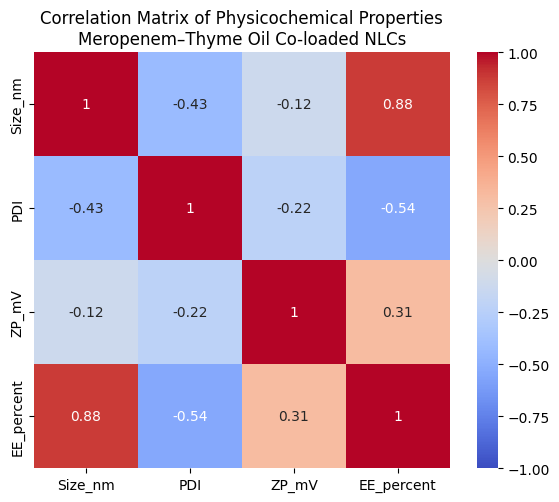

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["Size_nm", "PDI", "ZP_mV", "EE_percent"]

corr = final[metrics].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True
)

plt.title(
    "Correlation Matrix of Physicochemical Properties\n"
    "Meropenem–Thyme Oil Co-loaded NLCs",
    fontsize=12
)

plt.tight_layout()
plt.savefig("figures/heatmap_correlation.png", dpi=300)
plt.show()


In [13]:
import numpy as np

df = final.copy()

# Absolute ZP for stability contribution
df["ZP_abs"] = df["ZP_mV"].abs()

# Min–max normalization
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())

df["Size_score"] = 1 - minmax(df["Size_nm"])      # smaller is better
df["PDI_score"]  = 1 - minmax(df["PDI"])          # lower is better
df["ZP_score"]   = minmax(df["ZP_abs"])           # higher |ZP| is better
df["EE_score"]   = minmax(df["EE_percent"])       # higher EE is better

# Composite optimization score (weights reflect pharma priorities)
df["Optimization_Score"] = (
    0.30 * df["Size_score"] +
    0.30 * df["PDI_score"] +
    0.20 * df["ZP_score"] +
    0.20 * df["EE_score"]
)

df_sorted = df.sort_values("Optimization_Score", ascending=False)
df_sorted[["FormulationID", "Optimization_Score"]]


,FormulationID,Optimization_Score
3,Batch D,0.553776
1,Batch B,0.426737
4,Batch E,0.357022
0,Batch A,0.335028
2,Batch C,NaN


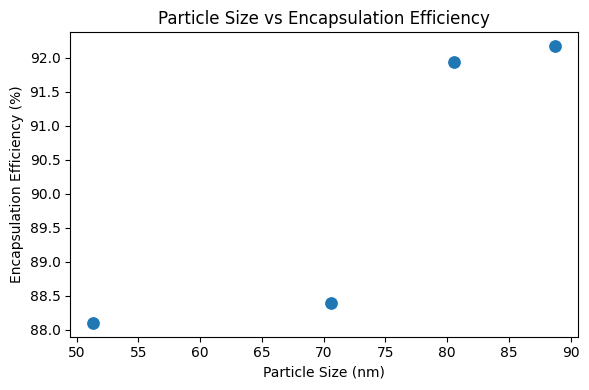

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=final,
    x="Size_nm",
    y="EE_percent",
    s=100
)

plt.title("Particle Size vs Encapsulation Efficiency")
plt.xlabel("Particle Size (nm)")
plt.ylabel("Encapsulation Efficiency (%)")
plt.tight_layout()
plt.savefig("figures/size_vs_EE.png", dpi=300)
plt.show()


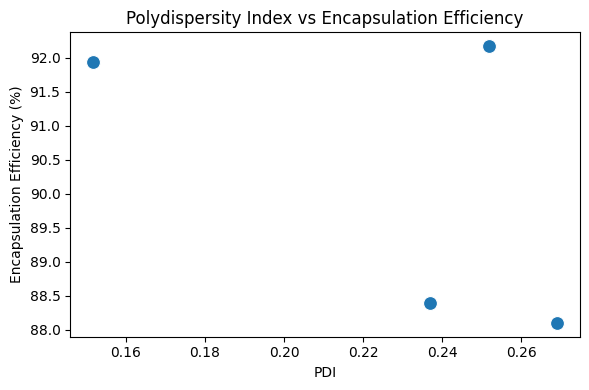

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=final,
    x="PDI",
    y="EE_percent",
    s=100
)

plt.title("Polydispersity Index vs Encapsulation Efficiency")
plt.xlabel("PDI")
plt.ylabel("Encapsulation Efficiency (%)")
plt.tight_layout()
plt.savefig("figures/PDI_vs_EE.png", dpi=300)
plt.show()


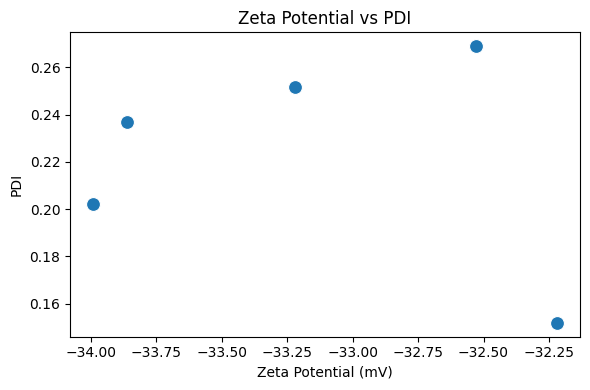

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=final,
    x="ZP_mV",
    y="PDI",
    s=100
)

plt.title("Zeta Potential vs PDI")
plt.xlabel("Zeta Potential (mV)")
plt.ylabel("PDI")
plt.tight_layout()
plt.savefig("figures/ZP_vs_PDI.png", dpi=300)
plt.show()
